In [19]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [23]:
import glob
import cv2

In [2]:
train_dir = 'concrete_crack_detection'

In [3]:
train_negative_dir = os.path.join(train_dir, 'Negative')
train_positive_dir = os.path.join(train_dir, 'Positive')

In [4]:
num_negative_tr = len(os.listdir(train_negative_dir))
num_positive_tr = len(os.listdir(train_positive_dir))

In [5]:
num_negative_tr

20000

In [6]:
num_positive_tr

20000

In [7]:
total_num = num_negative_tr + num_positive_tr
total_num

40000

In [8]:
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [9]:
train_image_generator = ImageDataGenerator(rescale=1./255)

In [10]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='binary')

Found 40000 images belonging to 2 classes.


In [11]:
train_datagen = ImageDataGenerator(rescale=1./255,
    validation_split=0.3) # set validation split

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    shuffle=True,
    batch_size=batch_size,
    class_mode='binary',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    train_dir, # same directory as training data
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation') # set as validation data

Found 28000 images belonging to 2 classes.
Found 12000 images belonging to 2 classes.


In [12]:
sample_training_images, y = next(train_data_gen)

In [13]:
y

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1.,
       0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0.,
       1., 1., 1., 1., 0., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 0.,
       1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1.,
       0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1.,
       0., 0., 1., 0., 0., 1., 0., 1., 1.], dtype=float32)

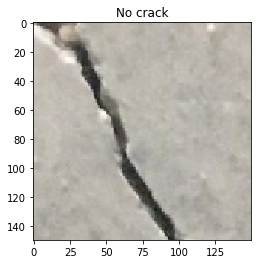

In [14]:
status=["Crack", "No crack"]
i=1
plt.imshow(sample_training_images[i])
plt.title(status[int(y[i])])
plt.show()

In [15]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    i=0
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

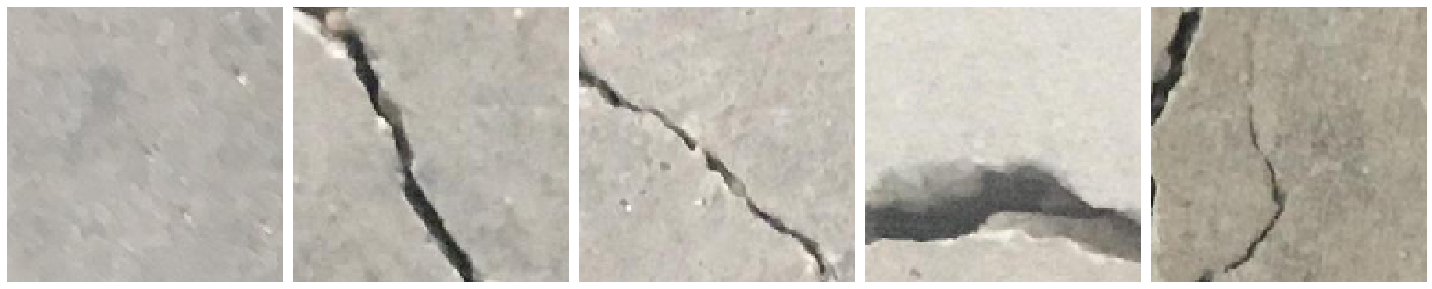

In [16]:
plotImages(sample_training_images[:5])

In [17]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1)
])

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = 4000 // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = 5)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
31/31 [==============================] - 155s 5s/step - loss: 1.3708 - accuracy: 0.6454 - val_loss: 0.4419 - val_accuracy: 0.8240
Epoch 2/5
31/31 [==============================] - 91s 3s/step - loss: 0.2260 - accuracy: 0.9214 - val_loss: 0.1185 - val_accuracy: 0.9551
Epoch 3/5
31/31 [==============================] - 93s 3s/step - loss: 0.0947 - accuracy: 0.9655 - val_loss: 0.0925 - val_accuracy: 0.9623
Epoch 4/5
31/31 [==============================] - 99s 3s/step - loss: 0.0834 - accuracy: 0.9718 - val_loss: 0.0849 - val_accuracy: 0.9600
Epoch 5/5
31/31 [==============================] - 93s 3s/step - loss: 0.0668 - accuracy: 0.9738 - val_loss: 0.0728 - val_accuracy: 0.9766


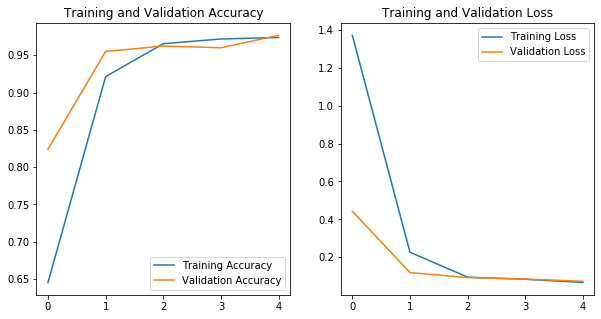

In [22]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(5)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [24]:
test_dir = r'C:\Users\shubh\Documents\steel_detection\concrete_test'
test_positive_dir = os.path.join(test_dir, 'Positive')
test_negative_dir = os.path.join(test_dir, 'Negative')

file_paths=[]
for folder in [test_positive_dir,test_negative_dir]:
    print(len(glob.glob(os.path.join(folder, '*.jpg'))))
    file_paths.extend(glob.glob(os.path.join(folder, '*.jpg')))

2
2


In [25]:
images=[cv2.imread(path) for path in file_paths]
images=np.asarray([cv2.resize(image,(IMG_HEIGHT,IMG_WIDTH)) for image in images])

In [26]:
X_test= images / 255

In [27]:
results = model.evaluate(sample_training_images[:100], y[:100])

4/4 [==============================] - 0s 60ms/step - loss: 0.2084 - accuracy: 0.9600
